# GCS Google Cloud Storage 
As the strage medium for SPark

By now, we have pq written files to local filesystem tree `tmp-data/pq/yellow` / `green`

Let's copy the pq files into gcs bucket. [Instructions here](./using_gloud.md#gcp-vm-copy-files-from-vm-local-to-gcs-bucket)

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.context import SparkContext


In [2]:
#.setMaster('spark://spark-medium.europe-southwest1-a.c.de-zoomcamp-jhigaki-course.internal:7077') \
#credentials_location = '/home/spark_jhigaki_gcp/de-zoomcamp-jhigaki-course----spark-gcs.json'

conf = SparkConf() \
    .setMaster("local[*]") \
    .setAppName('small_test_01')\
    .set("spark.jars", "/home/spark_jhigaki_gcp/spark/lib/gcs-connector-3.0.4.jar")\
    

    .set("spark.hadoop.google.cloud.auth.service.account.enable", "true") \
    .set("spark.hadoop.google.cloud.auth.service.account.json.keyfile", credentials_location)\
    .set("spark.hadoop.fs.gs.project.id", "de-zoomcamp-jhigaki-course") \
    .set("spark.hadoop.fs.gs.system.bucket", "de-zoomcamp-jhigaki-nyc-taxi") \
    .set("spark.hadoop.fs.gs.auth.service.account.email", "spark-gcs@de-zoomcamp-jhigaki-course.iam.gserviceaccount.com")\
    .set("spark.hadoop.fs.gs.auth.service.account.json.keyfile", credentials_location) \
    .set("spark.hadoop.fs.gs.auth.service.account.enable", "true")\
    .set("spark.hadoop.fs.gs.metadata.cache.enable", "false") \
    .set("google.cloud.auth.disable.metadata.server.fallback", "true")\
    .set("spark.executor.extraJavaOptions", "-Djava.util.logging.config.file=log.properties") \
    .set("spark.driver.extraJavaOptions", "-Djava.util.logging.config.file=log.properties")
  

In [3]:
sc = SparkContext(conf=conf)
hadoop_conf = sc._jsc.hadoopConfiguration()
hadoop_conf.set("fs.AbstractFileSystem.gs.impl",  "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFS")
hadoop_conf.set("fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")

24/12/04 16:59:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/04 16:59:39 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.







hadoop_conf.set("fs.gs.auth.service.account.json.keyfile", credentials_location)
hadoop_conf.set("fs.gs.auth.service.account.enable", "true")

In [4]:
spark = SparkSession.builder \
    .config(conf=sc.getConf())\
    .getOrCreate()

In [5]:
sc.uiWebUrl

'http://spark-medium.europe-southwest1-a.c.de-zoomcamp-jhigaki-course.internal:4041'

In [6]:
df_green_2019_01 = spark.read\
    .parquet(f'gs://de-zoomcamp-jhigaki-nyc-taxi/pq/green/2019/01')

24/12/04 16:59:43 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-google-hadoop-file-system.properties,hadoop-metrics2.properties


In [7]:
df_green_2019_01.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|       2| 2019-01-22 20:19:05|  2019-01-22 20:34:57|                 N|       1.0|          42|         220|            6.0|         6.15|       20.0|  0.5|    0.

In [8]:
df_green_2019_01.coalesce(1).write.csv('gs://de-zoomcamp-jhigaki-nyc-taxi/pq/df_green_2019_01.csv')

Py4JJavaError: An error occurred while calling o113.csv.
: com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.json.GoogleJsonResponseException: 403 Forbidden
POST https://storage.googleapis.com/upload/storage/v1/b/de-zoomcamp-jhigaki-nyc-taxi/o?ifGenerationMatch=0&uploadType=multipart
{
  "error": {
    "code": 403,
    "message": "Access denied.",
    "errors": [
      {
        "message": "Access denied.",
        "domain": "global",
        "reason": "forbidden"
      }
    ]
  }
}

	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.json.GoogleJsonResponseException.from(GoogleJsonResponseException.java:146)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.json.AbstractGoogleJsonClientRequest.newExceptionOnError(AbstractGoogleJsonClientRequest.java:118)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.json.AbstractGoogleJsonClientRequest.newExceptionOnError(AbstractGoogleJsonClientRequest.java:37)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.AbstractGoogleClientRequest.executeUnparsed(AbstractGoogleClientRequest.java:543)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.AbstractGoogleClientRequest.executeUnparsed(AbstractGoogleClientRequest.java:466)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.AbstractGoogleClientRequest.execute(AbstractGoogleClientRequest.java:576)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageImpl.createEmptyObject(GoogleCloudStorageImpl.java:525)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageImpl.createEmptyObject(GoogleCloudStorageImpl.java:554)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageFileSystemImpl.mkdirsInternal(GoogleCloudStorageFileSystemImpl.java:548)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageFileSystemImpl.mkdirs(GoogleCloudStorageFileSystemImpl.java:515)
	at com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem.lambda$mkdirs$13(GoogleHadoopFileSystem.java:864)
	at org.apache.hadoop.fs.statistics.impl.IOStatisticsBinding.lambda$trackDurationOfOperation$5(IOStatisticsBinding.java:499)
	at org.apache.hadoop.fs.statistics.impl.IOStatisticsBinding.trackDuration(IOStatisticsBinding.java:444)
	at com.google.cloud.hadoop.fs.gcs.GhfsGlobalStorageStatistics.trackDuration(GhfsGlobalStorageStatistics.java:114)
	at com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem.trackDurationWithTracing(GoogleHadoopFileSystem.java:759)
	at com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem.mkdirs(GoogleHadoopFileSystem.java:851)
	at org.apache.hadoop.fs.FileSystem.mkdirs(FileSystem.java:2388)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:133)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:856)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:387)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:360)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:847)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)


In [ ]:
df_green_2019_01.write.parquet('gs://de-zoomcamp-jhigaki-nyc-taxi/pq/y_g_tripdata/df_green_2019_01.parquet')

Py4JJavaError: An error occurred while calling o126.parquet.
: com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.json.GoogleJsonResponseException: 403 Forbidden
POST https://storage.googleapis.com/upload/storage/v1/b/de-zoomcamp-jhigaki-nyc-taxi/o?ifGenerationMatch=0&uploadType=multipart
{
  "error": {
    "code": 403,
    "message": "Access denied.",
    "errors": [
      {
        "message": "Access denied.",
        "domain": "global",
        "reason": "forbidden"
      }
    ]
  }
}

	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.json.GoogleJsonResponseException.from(GoogleJsonResponseException.java:146)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.json.AbstractGoogleJsonClientRequest.newExceptionOnError(AbstractGoogleJsonClientRequest.java:118)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.json.AbstractGoogleJsonClientRequest.newExceptionOnError(AbstractGoogleJsonClientRequest.java:37)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.AbstractGoogleClientRequest.executeUnparsed(AbstractGoogleClientRequest.java:543)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.AbstractGoogleClientRequest.executeUnparsed(AbstractGoogleClientRequest.java:466)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.api.client.googleapis.services.AbstractGoogleClientRequest.execute(AbstractGoogleClientRequest.java:576)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageImpl.createEmptyObject(GoogleCloudStorageImpl.java:525)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageImpl.createEmptyObject(GoogleCloudStorageImpl.java:554)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageFileSystemImpl.mkdirsInternal(GoogleCloudStorageFileSystemImpl.java:548)
	at com.google.cloud.hadoop.repackaged.gcs.com.google.cloud.hadoop.gcsio.GoogleCloudStorageFileSystemImpl.mkdirs(GoogleCloudStorageFileSystemImpl.java:515)
	at com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem.lambda$mkdirs$13(GoogleHadoopFileSystem.java:864)
	at org.apache.hadoop.fs.statistics.impl.IOStatisticsBinding.lambda$trackDurationOfOperation$5(IOStatisticsBinding.java:499)
	at org.apache.hadoop.fs.statistics.impl.IOStatisticsBinding.trackDuration(IOStatisticsBinding.java:444)
	at com.google.cloud.hadoop.fs.gcs.GhfsGlobalStorageStatistics.trackDuration(GhfsGlobalStorageStatistics.java:114)
	at com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem.trackDurationWithTracing(GoogleHadoopFileSystem.java:759)
	at com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem.mkdirs(GoogleHadoopFileSystem.java:851)
	at org.apache.hadoop.fs.FileSystem.mkdirs(FileSystem.java:2388)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:133)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:856)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:387)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:360)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at org.apache.spark.sql.DataFrameWriter.parquet(DataFrameWriter.scala:789)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)


Tested with gsutil

with service account instance
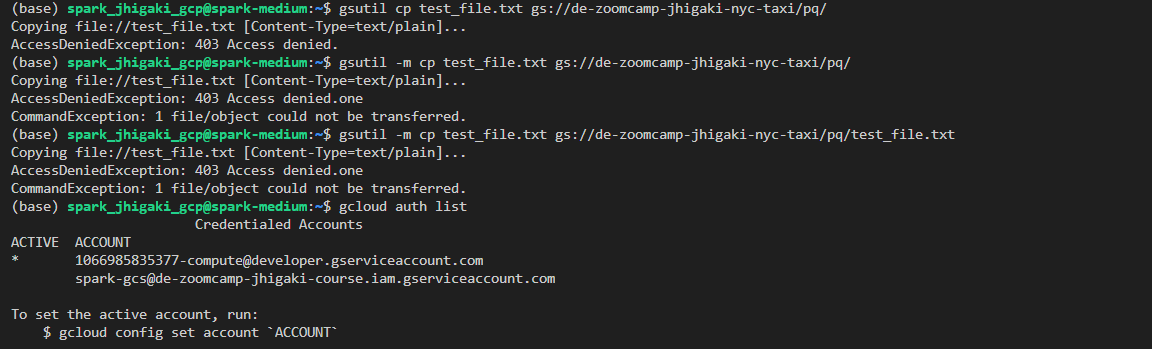


THen tested with spark-gcs credential

`gcloud auth activate-service-account --key-file=/home/spark_jhigaki_gcp/de-zoomcamp-jhigaki-course----spark-gcs.json`

`echo "This is a test file2." > test_file_2.txt`

`gsutil -m cp test_file_2.txt gs://de-zoomcamp-jhigaki-nyc-taxi/pq/test_file_2.txt`

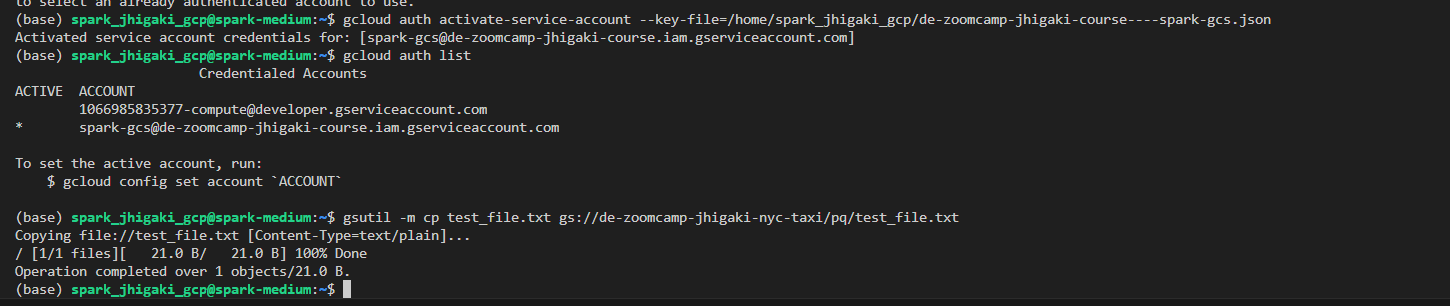

SUcceeded

*********************

Now, I just allowed  to the `1066985835377-compute@developer.gserviceaccount.com` 
GIven ACcess Scope Read Write for storage


Since I can't seem to override 

Didn;'t work
*********************

*********************

Now, I just allowed  to the `1066985835377-compute@developer.gserviceaccount.com` 
GIven Full access to ACcess  all Cloud APIs

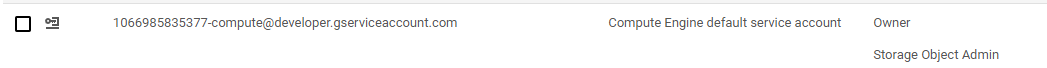

gsutil -m cp test_file_4.txt gs://de-zoomcamp-jhigaki-nyc-taxi/pq/test_file_4.txt

```bash
(base) spark_jhigaki_gcp@spark-medium:~$ gsutil -m cp test_file_4.txt gs://de-zoomcamp-jhigaki-nyc-taxi/pq/test_file_4.txt
Copying file://test_file_4.txt [Content-Type=text/plain]...
AccessDeniedException: 403 Access denied.one                                    
CommandException: 1 file/object could not be transferred.
```

Where as with `gcloud config set account spark-gcs@de-zoomcamp-jhigaki-course.iam.gserviceaccount.com`

It does work

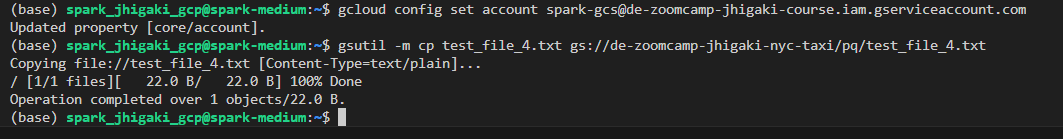

*********************

Now, let's use spark-gcs as the default credential of the VM
Scope: default accesss


echo "This is a test file5." > test_file_5.txt


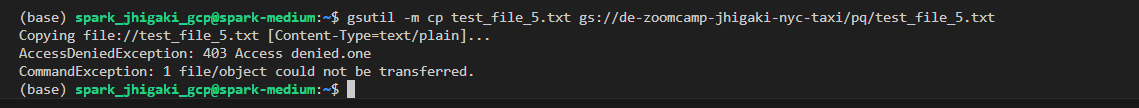

without having changed the spark-gcs@de-zoomcamp-jhigaki-course.iam.gserviceaccount.com it failed



(base) spark_jhigaki_gcp@spark-medium:~$ gsutil -m cp test_file_5.txt gs://de-zoomcamp-jhigaki-nyc-taxi/pq/test_file_5.txt
Copying file://test_file_5.txt [Content-Type=text/plain]...
AccessDeniedException: 403 Access denied.one               

Read carefully
https://cloud.google.com/compute/docs/access/service-accounts?hl=en&_gl=1*tjlts3*_ga*Nzg5MjYwMjQzLjE3MjgwMzY0MzE.*_ga_WH2QY8WWF5*MTczMzMyNDY4OC4xMTcuMS4xNzMzMzMzMjc1LjQ3LjAuMA..#the_default_service_account


Next test:
full access to spark-gcs as service account at the instance vm
